# Modeling

## Import Libraries

In [68]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# supress scientific notation
np.set_printoptions(suppress=True)

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

#Libraries for obtaining data from SQL databse
import env
import os

## Iris Dataset

### Import Dataset

In [26]:
from pydataset import data

# import data

iris = data('iris')
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


#### Rename columns

In [27]:
iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species']
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [28]:
X = iris[['petal_width', 'sepal_width']]
X.head()

,petal_width,sepal_width
1,0.2,3.5
2,0.2,3.0
3,0.2,3.2
4,0.2,3.1
5,0.2,3.6


### Scale the data

In [29]:
scaler = MinMaxScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns = X.columns).set_index([X.index.values])

### Fit the K Means model

In [30]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

kmeans.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [31]:
iris['cluster'] = kmeans.predict(X)
X_scaled['cluster'] = kmeans.predict(X_scaled)

### Plot Result

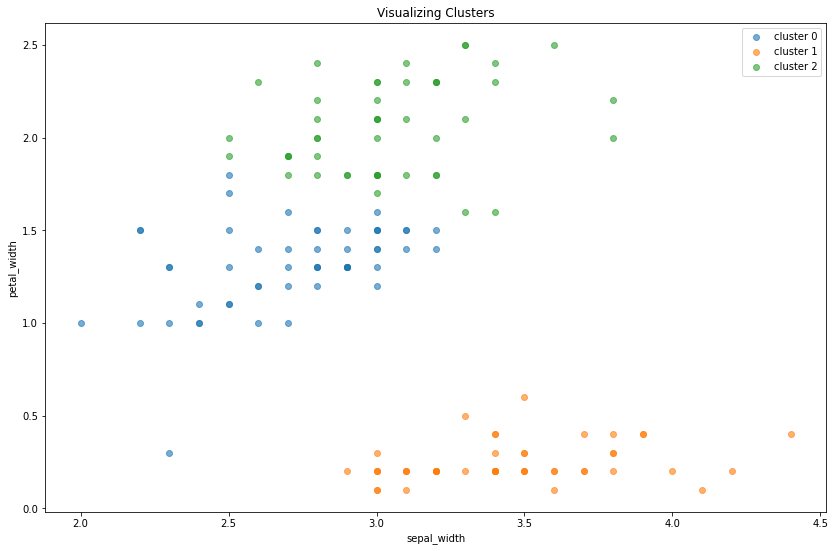

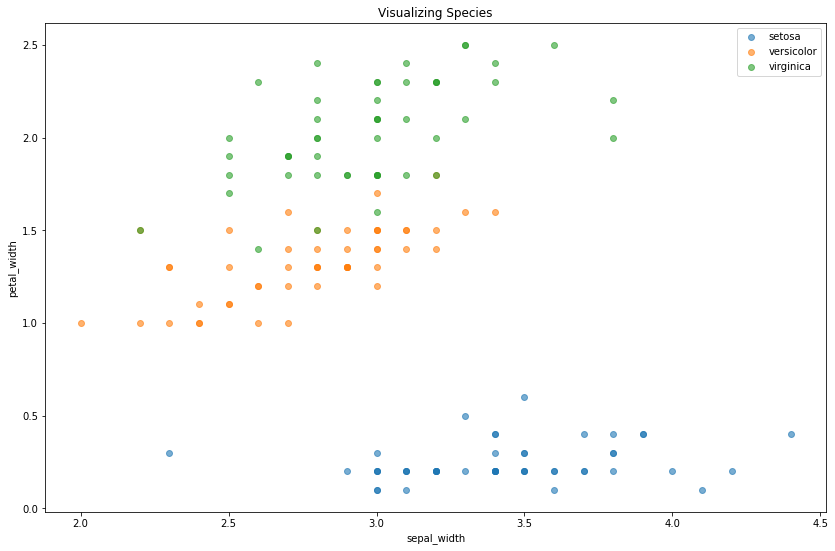

In [32]:
plt.figure(figsize=(14, 9))

for cluster, subset in iris.groupby('cluster'):
    plt.scatter(subset.sepal_width, subset.petal_width, label='cluster ' + str(cluster), alpha=.6, cmap='reds')
plt.legend()
plt.xlabel('sepal_width')
plt.ylabel('petal_width')
plt.title('Visualizing Clusters')
plt.show()


plt.figure(figsize=(14, 9))
for cluster, subset in iris.groupby('species'):
    plt.scatter(subset.sepal_width, subset.petal_width, label=str(cluster), alpha=.6)
# centroids.plot.scatter(y='petal_length', x='sepal_length', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('sepal_width')
plt.ylabel('petal_width')
plt.title('Visualizing Species')
plt.show()

### Create Centroids

In [33]:
kmeans.cluster_centers_

array([[1.30943396, 2.70754717],
       [0.24489796, 3.45102041],
       [2.05208333, 3.04166667]])

In [34]:

# Make a dataframe 
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

,petal_width,sepal_width
0,1.309434,2.707547
1,0.244898,3.451020
2,2.052083,3.041667


In [36]:
centroids = iris.groupby('cluster')['sepal_width', 'petal_width'].mean()
centroids

,sepal_width,petal_width
cluster,,
0,2.707547,1.309434
1,3.451020,0.244898
2,3.041667,2.052083


### Graph the Clusters with Centroids

Text(0.5, 1.0, 'Visualizing Cluster Centers')

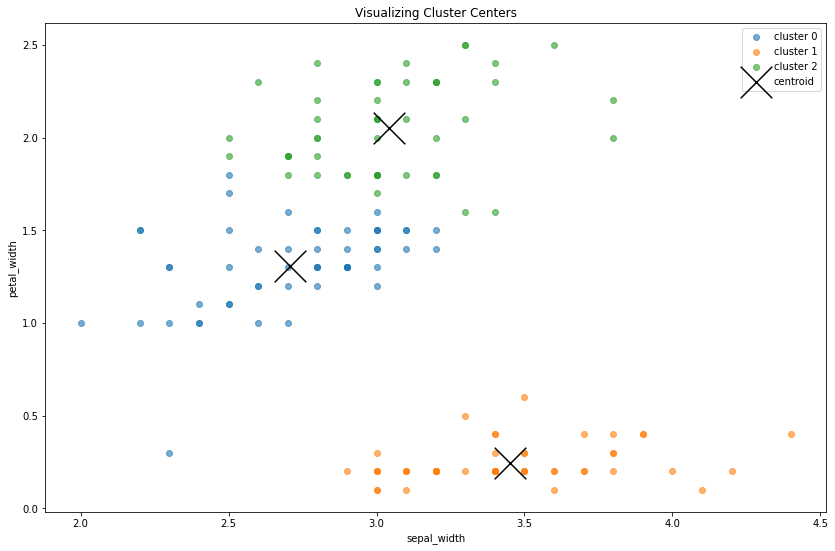

In [37]:
plt.figure(figsize=(14, 9))

for cluster, subset in iris.groupby('cluster'):
    plt.scatter(subset.sepal_width, subset.petal_width, label='cluster ' + str(cluster), alpha=.6)

centroids.plot.scatter(y='petal_width', x='sepal_width', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('sepal_width')
plt.ylabel('petal_width')
plt.title('Visualizing Cluster Centers')

### Elbow Method

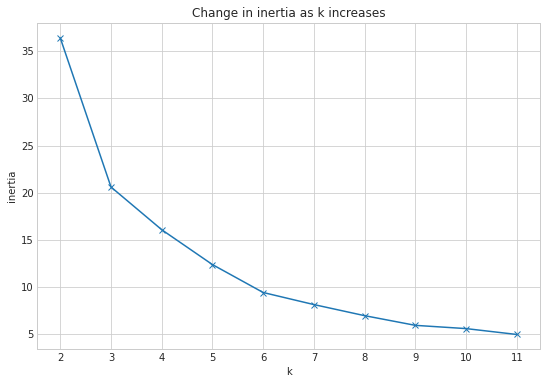

In [38]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

Inertia appears to drop off after 5 cluster groups.

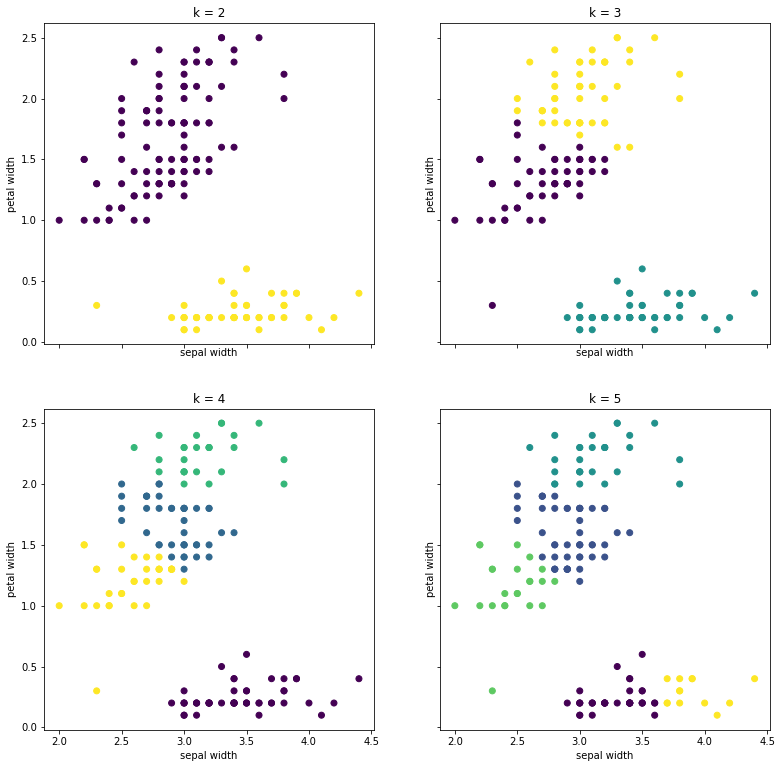

In [39]:
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X).predict(X)
    ax.scatter(X.sepal_width, X.petal_width, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='sepal width', ylabel='petal width')

Five cluster groups seems to be the optimum amount.

### Graph data with five cluster groups

In [42]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

kmeans.predict(X)

kmeans.cluster_centers_

array([[1.15217391, 2.44782609],
       [0.23636364, 3.25757576],
       [2.225     , 3.12857143],
       [1.582     , 2.912     ],
       [0.2625    , 3.85      ]])

In [43]:
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

,petal_width,sepal_width
0,1.152174,2.447826
1,0.236364,3.257576
2,2.225000,3.128571
3,1.582000,2.912000
4,0.262500,3.850000


In [53]:
X_scaled = X_scaled.drop('cluster', axis = 1)

In [54]:
iris['cluster'] = kmeans.predict(X)
X_scaled['cluster'] = kmeans.predict(X_scaled)

In [56]:
centroids = iris.groupby('cluster')['sepal_width', 'petal_width'].mean()
centroids

,sepal_width,petal_width
cluster,,
0,2.447826,1.152174
1,3.257576,0.236364
2,3.128571,2.225000
3,2.912000,1.582000
4,3.850000,0.262500


Text(0.5, 1.0, 'Visualizing Cluster Centers')

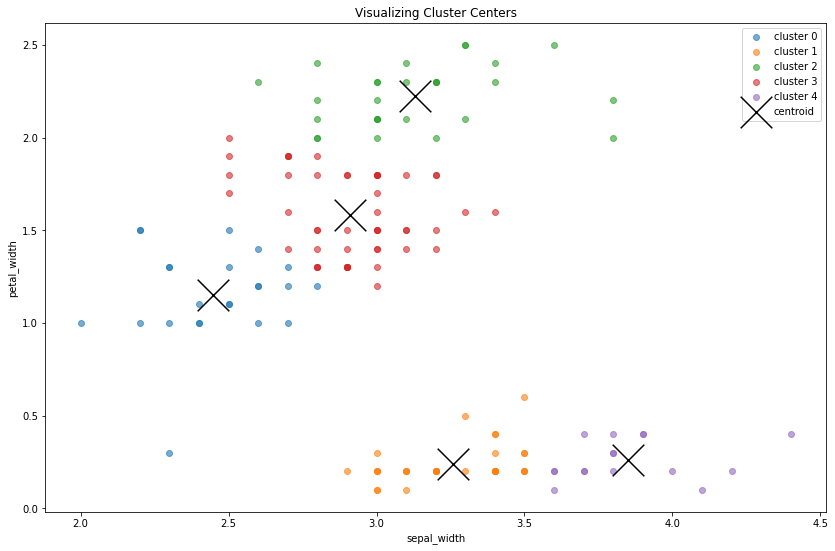

In [57]:
plt.figure(figsize=(14, 9))

for cluster, subset in iris.groupby('cluster'):
    plt.scatter(subset.sepal_width, subset.petal_width, label='cluster ' + str(cluster), alpha=.6)

centroids.plot.scatter(y='petal_width', x='sepal_width', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('sepal_width')
plt.ylabel('petal_width')
plt.title('Visualizing Cluster Centers')

### Create clusters using three features

In [59]:
X = iris[['petal_width', 'sepal_width', 'petal_length']]
scaler = MinMaxScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns = X.columns).set_index([X.index.values])
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

kmeans.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

#### Assign clusters

In [60]:
iris['cluster'] = kmeans.predict(X)
X_scaled['cluster'] = kmeans.predict(X_scaled)

#### Fit the model and make centroids

In [65]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

kmeans.predict(X)

kmeans.cluster_centers_

centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

centroids = iris.groupby('cluster')['sepal_width', 'petal_width'].mean()
centroids

,sepal_width,petal_width
cluster,,
0,2.754717,1.350943
1,3.428000,0.246000
2,3.004255,2.042553


#### Plot the result

Text(0.5, 1.0, 'Visualizing Cluster Centers')

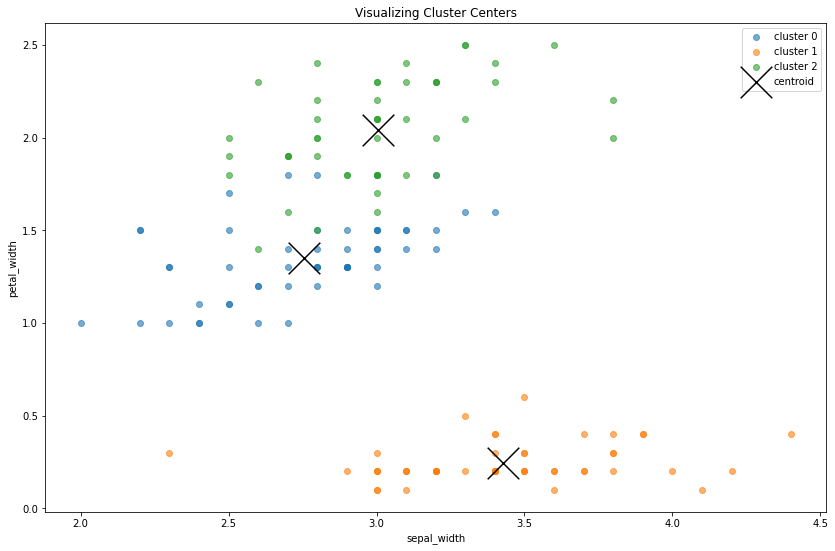

In [66]:
plt.figure(figsize=(14, 9))

for cluster, subset in iris.groupby('cluster'):
    plt.scatter(subset.sepal_width, subset.petal_width, label='cluster ' + str(cluster), alpha=.6)

centroids.plot.scatter(y='petal_width', x='sepal_width', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('sepal_width')
plt.ylabel('petal_width')
plt.title('Visualizing Cluster Centers')

## Mall customers dataset

In [69]:
#First we establish a connection to the SQL server
def get_connection(db, user=env.user, host=env.host, password=env.password):
    '''
     We establish a connection to the SQL database, using my information stored in the env file.
    '''
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

In [70]:
def get_mall_customer_data():
    filename = "mall_customers.csv"
    sql = ''' 
    SELECT *
    FROM customers;
    '''
    if os.path.isfile(filename):
        return pd.read_csv(filename)
    else:
        df = pd.read_sql(sql, get_connection('mall_customers'))
        return df
    df = pd.read_sql(sql, get_connection('mall_customers'))
    return df

In [72]:
df = get_mall_customer_data()
df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [73]:
X = df[['annual_income', 'spending_score']]
scaler = MinMaxScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns = X.columns).set_index([X.index.values])
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

kmeans.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [74]:
df['cluster'] = kmeans.predict(X)
X_scaled['cluster'] = kmeans.predict(X_scaled)

In [77]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

kmeans.predict(X)

kmeans.cluster_centers_

centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

centroids = df.groupby('cluster')['annual_income', 'spending_score'].mean()
centroids

,annual_income,spending_score
cluster,,
0,87.000000,18.631579
1,44.154472,49.829268
2,86.538462,82.128205


Text(0.5, 1.0, 'Visualizing Cluster Centers')

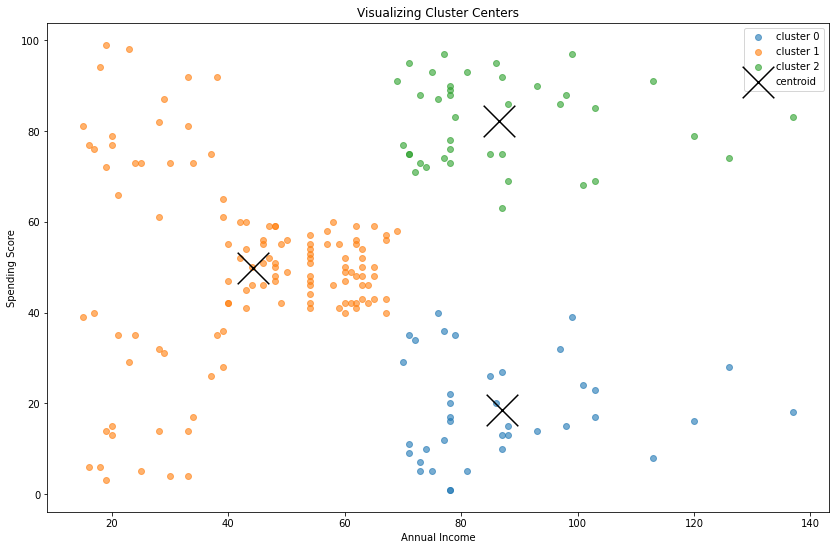

In [81]:
plt.figure(figsize=(14, 9))

for cluster, subset in df.groupby('cluster'):
    plt.scatter(subset.annual_income, subset.spending_score, label='cluster ' + str(cluster), alpha=.6)

centroids.plot.scatter(y='spending_score', x='annual_income', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Visualizing Cluster Centers')

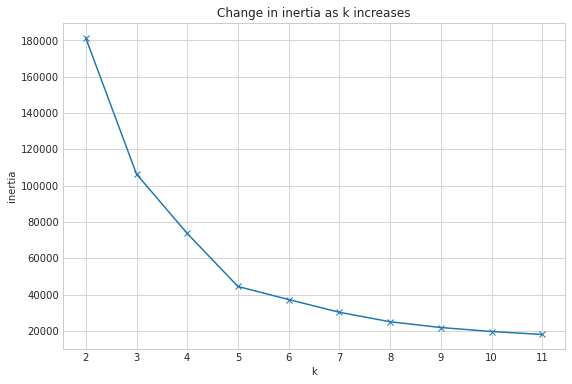

In [82]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [87]:
X_scaled = X_scaled.drop("cluster", axis = 1)

In [88]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

kmeans.predict(X)
df['cluster'] = kmeans.predict(X)
X_scaled['cluster'] = kmeans.predict(X_scaled)

centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

centroids = df.groupby('cluster')['annual_income', 'spending_score'].mean()
centroids

,annual_income,spending_score
cluster,,
0,88.200000,17.114286
1,55.296296,49.518519
2,86.538462,82.128205
3,25.727273,79.363636
4,26.304348,20.913043


Text(0.5, 1.0, 'Visualizing Cluster Centers')

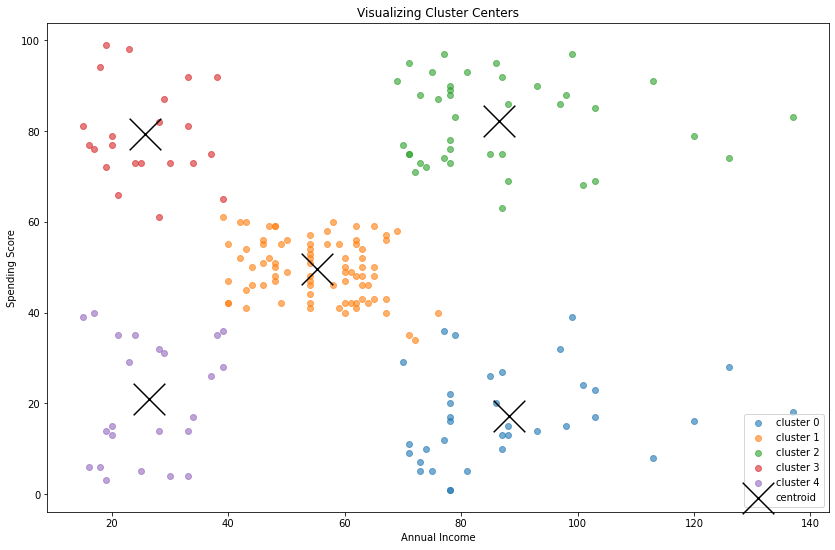

In [89]:
plt.figure(figsize=(14, 9))

for cluster, subset in df.groupby('cluster'):
    plt.scatter(subset.annual_income, subset.spending_score, label='cluster ' + str(cluster), alpha=.6)

centroids.plot.scatter(y='spending_score', x='annual_income', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Visualizing Cluster Centers')

## Comparing Scaled and Unscaled Data

In [92]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X_scaled.columns)
centroids_scaled

centroids = X_scaled.groupby('cluster')['annual_income', 'spending_score'].mean()
centroids

,annual_income,spending_score
cluster,,
0,0.586381,0.827839
1,0.330298,0.495087
2,0.087928,0.799629
3,0.600000,0.164431
4,0.092659,0.203194


Text(0.5, 1.0, 'Visualizing Cluster Centers')

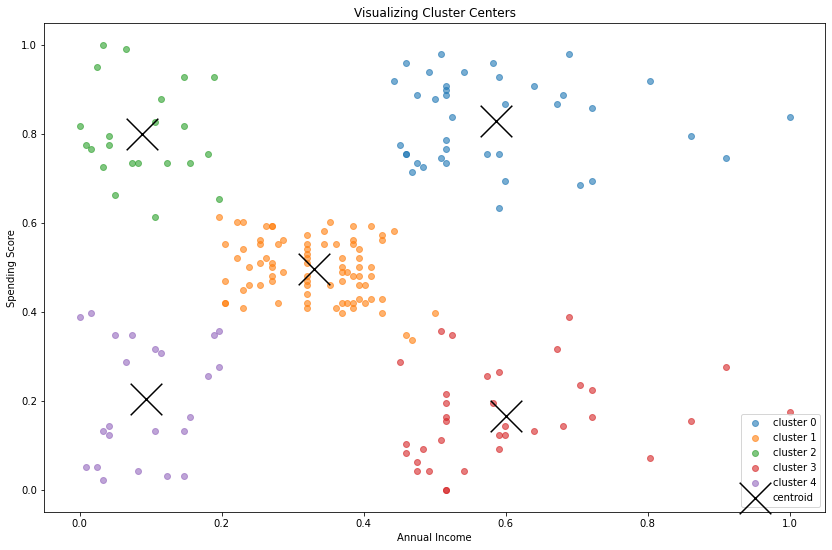

In [94]:
plt.figure(figsize=(14, 9))

for cluster, subset in X_scaled.groupby('cluster'):
    plt.scatter(subset.annual_income, subset.spending_score, label='cluster ' + str(cluster), alpha=.6)

centroids.plot.scatter(y='spending_score', x='annual_income', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Visualizing Cluster Centers')

The graph for scaled data for mall customers looks identical to the unscaled graph, except for the axes labels.